## 1. Import Libraries

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Machine learning
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Utilities
import joblib
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10
sns.set_palette('husl')

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 1.26.4
Pandas version: 2.3.3


## 2. Load and Explore the Dataset

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame for easier exploration
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)

print("Dataset Shape:", df.shape)
print("\nFeatures:", feature_names)
print("\nTarget Classes:", target_names)
print("\nClass Distribution:")
print(df['species'].value_counts())
print("\nFirst few rows:")
df.head(10)

Dataset Shape: (150, 5)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Classes: ['setosa' 'versicolor' 'virginica']

Class Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

First few rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## 3. Statistical Summary and Correlation Analysis

In [3]:
# Statistical summary
print("Statistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Statistical Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


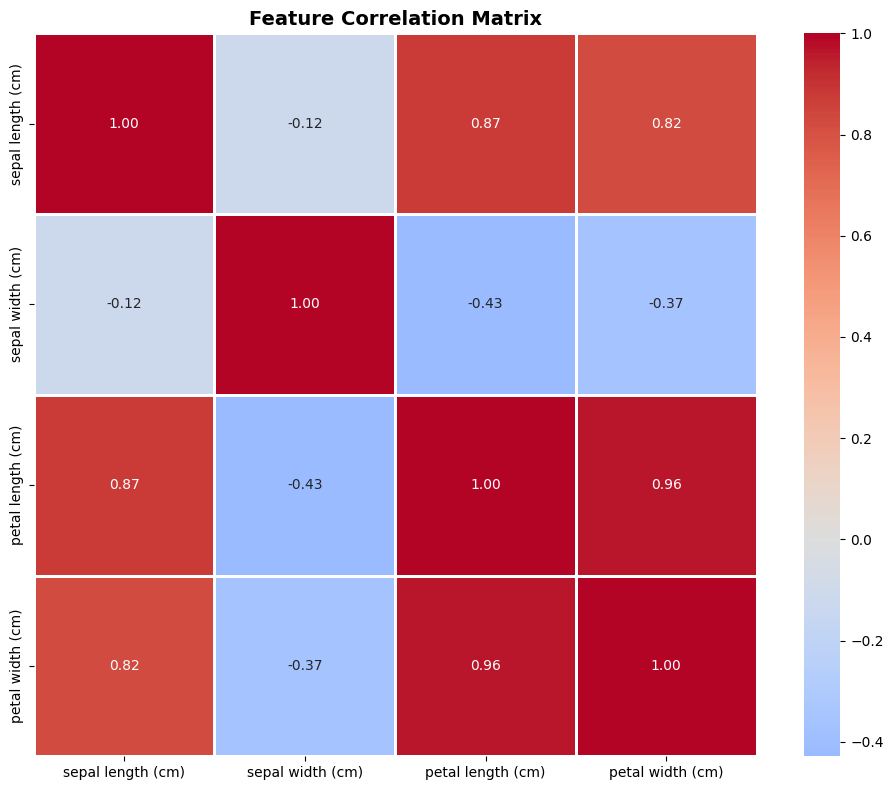


Highly Correlated Features:
sepal length (cm) <-> petal length (cm): 0.872
sepal length (cm) <-> petal width (cm): 0.818
petal length (cm) <-> petal width (cm): 0.963


In [4]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('output/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nHighly Correlated Features:")
# Find pairs with correlation > 0.8
high_corr = np.where(np.abs(correlation_matrix) > 0.8)
high_corr_list = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y])
                  for x, y in zip(*high_corr) if x != y and x < y]
for feat1, feat2, corr in high_corr_list:
    print(f"{feat1} <-> {feat2}: {corr:.3f}")

## 4. Visualize Original 4D Data (Pairwise Plots)

<Figure size 1200x1000 with 0 Axes>

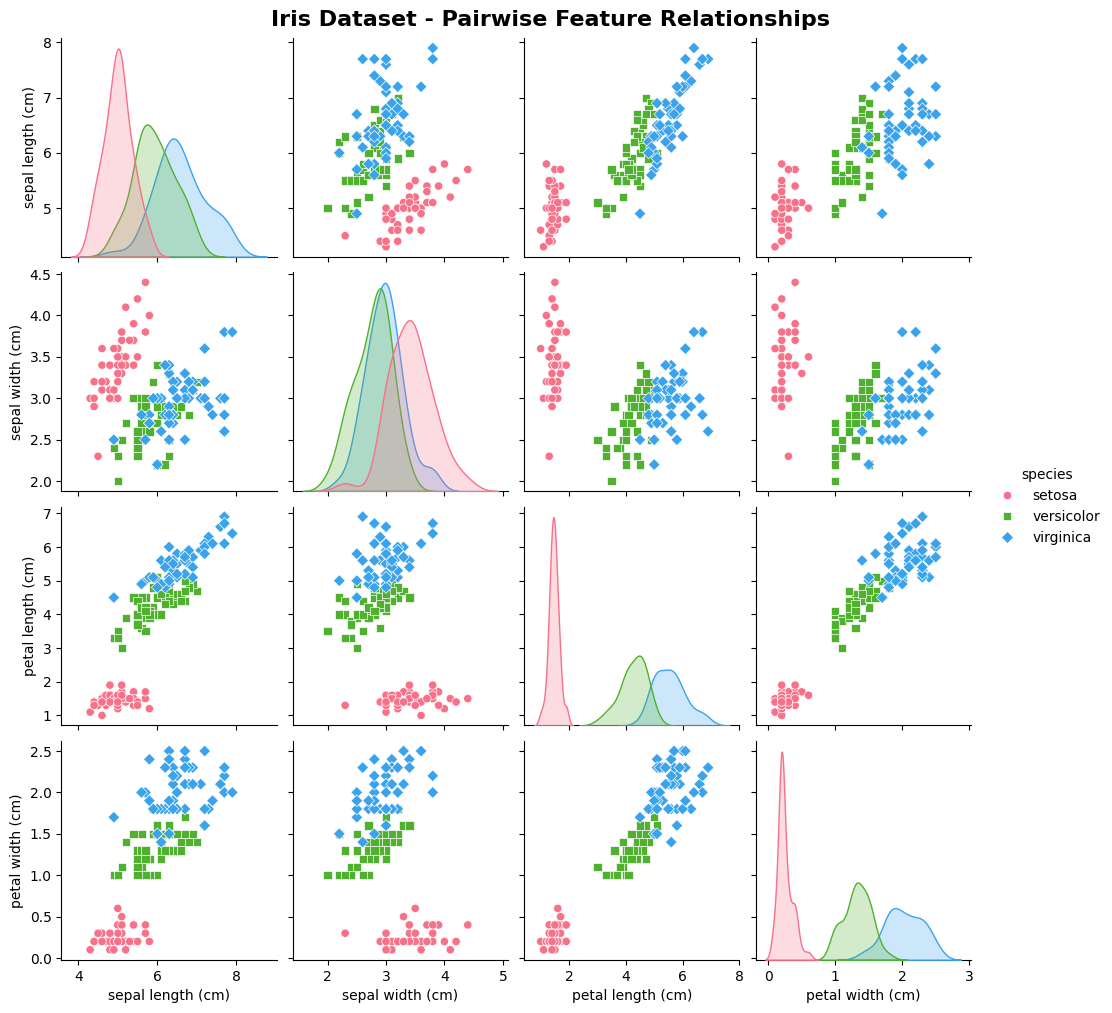

Pairplot shows relationships between all 4 features
Notice: Petal measurements show better class separation than sepal measurements


In [5]:
# Create pairplot to visualize relationships
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(df, hue='species', markers=['o', 's', 'D'],
                        palette='husl', diag_kind='kde', height=2.5)
pairplot.fig.suptitle('Iris Dataset - Pairwise Feature Relationships', 
                      y=1.01, fontsize=16, fontweight='bold')
plt.savefig('output/pairplot_original.png', dpi=300, bbox_inches='tight')
plt.show()

print("Pairplot shows relationships between all 4 features")
print("Notice: Petal measurements show better class separation than sepal measurements")

## 5. Feature Standardization

PCA is affected by scale, so we need to standardize features to have mean=0 and std=1

In [6]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original Data Statistics:")
print(f"Mean: {X.mean(axis=0)}")
print(f"Std:  {X.std(axis=0)}")
print("\nScaled Data Statistics:")
print(f"Mean: {X_scaled.mean(axis=0)}")
print(f"Std:  {X_scaled.std(axis=0)}")

# Save scaler for future use
joblib.dump(scaler, 'models/scaler.joblib')
print("\nScaler saved to models/scaler.joblib")

Original Data Statistics:
Mean: [5.84333333 3.05733333 3.758      1.19933333]
Std:  [0.82530129 0.43441097 1.75940407 0.75969263]

Scaled Data Statistics:
Mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Std:  [1. 1. 1. 1.]

Scaler saved to models/scaler.joblib


## 6. Apply PCA - Full Analysis

In [7]:
# Apply PCA with all components to understand variance
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Variance explained by each component
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance by Each Principal Component:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {var*100:.2f}% (Cumulative: {cum_var*100:.2f}%)")

print(f"\nFirst 2 components explain: {cumulative_variance[1]*100:.2f}% of variance")
print(f"First 3 components explain: {cumulative_variance[2]*100:.2f}% of variance")

Explained Variance by Each Principal Component:
PC1: 72.96% (Cumulative: 72.96%)
PC2: 22.85% (Cumulative: 95.81%)
PC3: 3.67% (Cumulative: 99.48%)
PC4: 0.52% (Cumulative: 100.00%)

First 2 components explain: 95.81% of variance
First 3 components explain: 99.48% of variance


## 7. Visualize Explained Variance

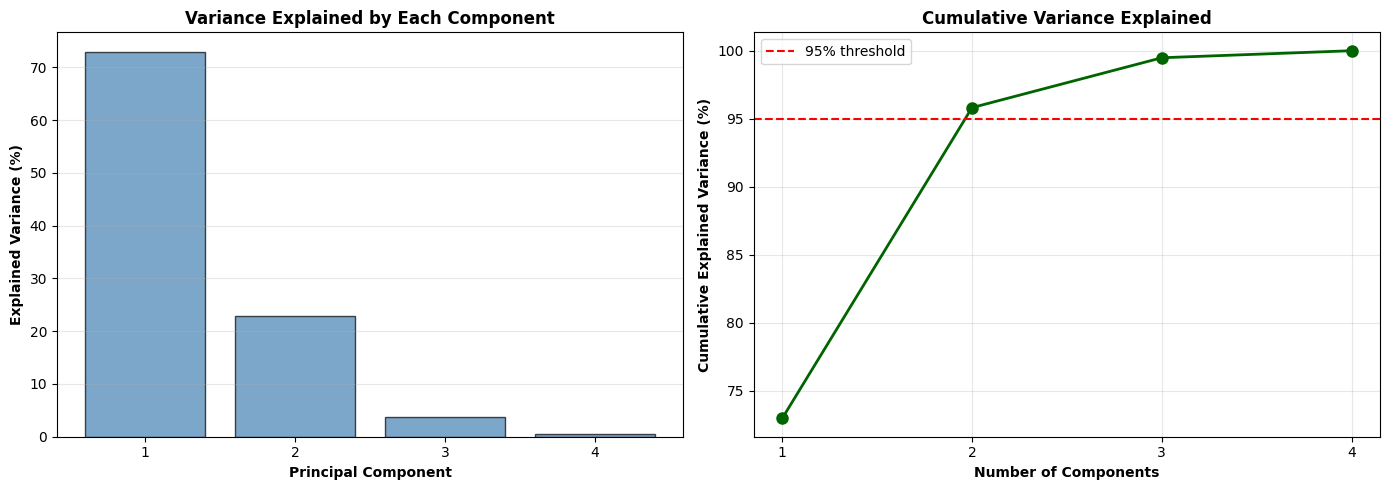

In [8]:
# Create variance visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual variance
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance * 100,
            alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Principal Component', fontweight='bold')
axes[0].set_ylabel('Explained Variance (%)', fontweight='bold')
axes[0].set_title('Variance Explained by Each Component', fontweight='bold')
axes[0].set_xticks(range(1, len(explained_variance) + 1))
axes[0].grid(axis='y', alpha=0.3)

# Cumulative variance
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100,
             marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1].axhline(y=95, color='r', linestyle='--', label='95% threshold')
axes[1].set_xlabel('Number of Components', fontweight='bold')
axes[1].set_ylabel('Cumulative Explained Variance (%)', fontweight='bold')
axes[1].set_title('Cumulative Variance Explained', fontweight='bold')
axes[1].set_xticks(range(1, len(cumulative_variance) + 1))
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('output/explained_variance.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Component Loadings Analysis

Principal Component Loadings:
                        PC1       PC2       PC3       PC4
sepal length (cm)  0.521066  0.377418  0.719566 -0.261286
sepal width (cm)  -0.269347  0.923296 -0.244382  0.123510
petal length (cm)  0.580413  0.024492 -0.142126  0.801449
petal width (cm)   0.564857  0.066942 -0.634273 -0.523597


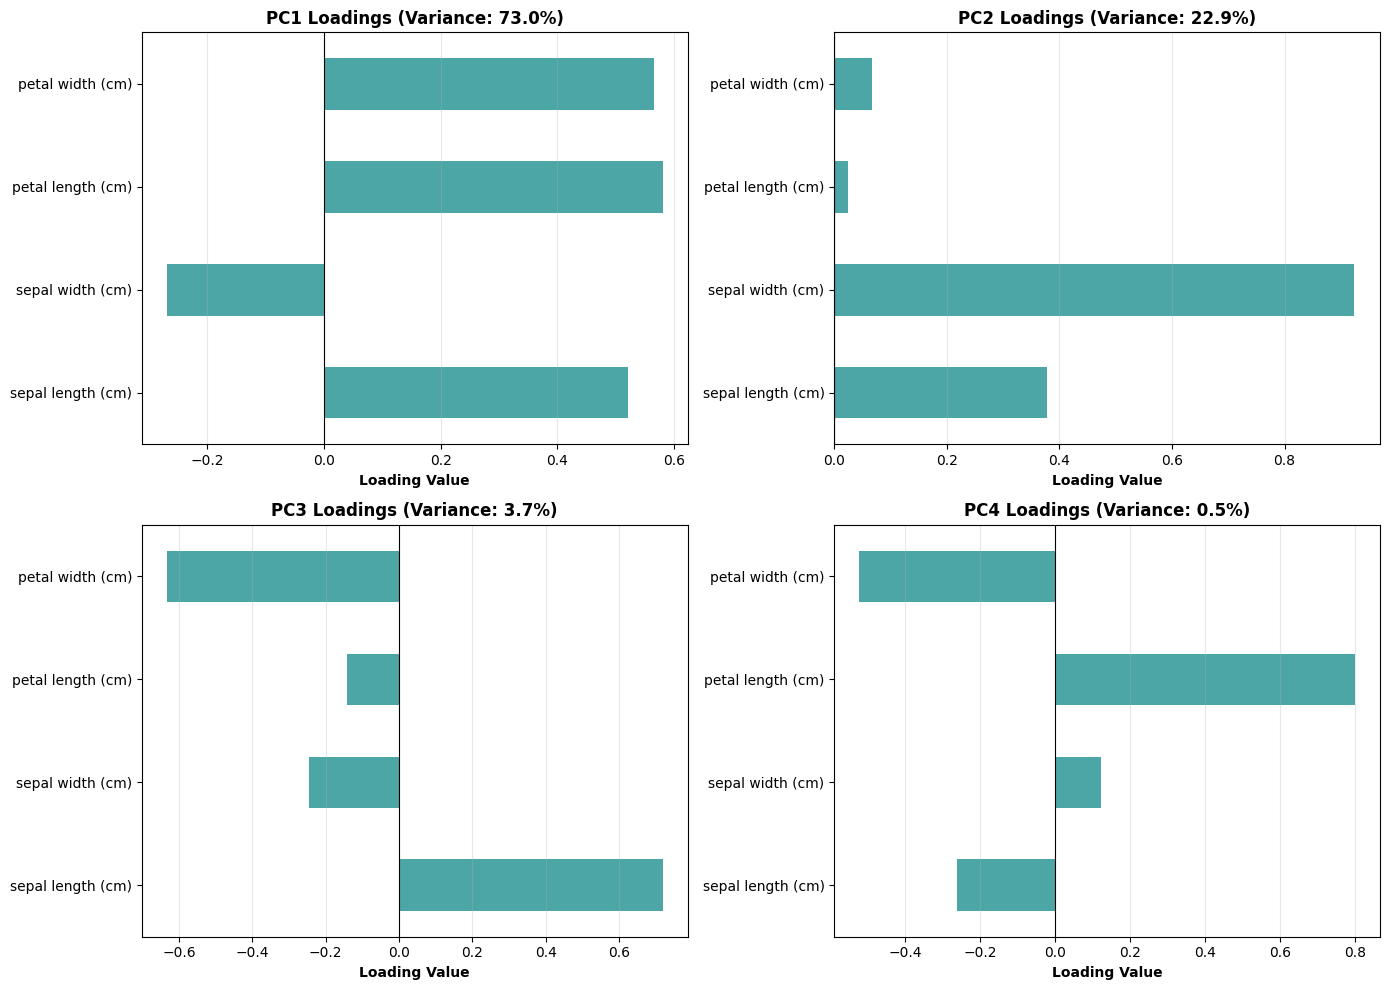


Interpretation:
PC1: High positive loadings on petal features - captures overall flower size
PC2: Separates sepal vs petal characteristics


In [9]:
# Analyze component loadings (feature contributions)
loadings = pd.DataFrame(
    pca_full.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca_full.components_))],
    index=feature_names
)

print("Principal Component Loadings:")
print(loadings)

# Visualize loadings
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i in range(4):
    loadings[f'PC{i+1}'].plot(kind='barh', ax=axes[i], color='teal', alpha=0.7)
    axes[i].set_title(f'PC{i+1} Loadings (Variance: {explained_variance[i]*100:.1f}%)',
                      fontweight='bold')
    axes[i].set_xlabel('Loading Value', fontweight='bold')
    axes[i].axvline(x=0, color='black', linewidth=0.8)
    axes[i].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('output/component_loadings.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nInterpretation:")
print("PC1: High positive loadings on petal features - captures overall flower size")
print("PC2: Separates sepal vs petal characteristics")

## 9. PCA with 2 Components (2D Visualization)

In [10]:
# Apply PCA with 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"Original dimensions: {X.shape}")
print(f"Reduced dimensions (2D): {X_pca_2d.shape}")
print(f"Variance preserved: {pca_2d.explained_variance_ratio_.sum()*100:.2f}%")

# Create DataFrame for easier plotting
df_pca_2d = pd.DataFrame(
    data=X_pca_2d,
    columns=['PC1', 'PC2']
)
df_pca_2d['species'] = pd.Categorical.from_codes(y, target_names)

# Save 2D PCA model
joblib.dump(pca_2d, 'models/pca_2d.joblib')
print("\n2D PCA model saved to models/pca_2d.joblib")

Original dimensions: (150, 4)
Reduced dimensions (2D): (150, 2)
Variance preserved: 95.81%

2D PCA model saved to models/pca_2d.joblib


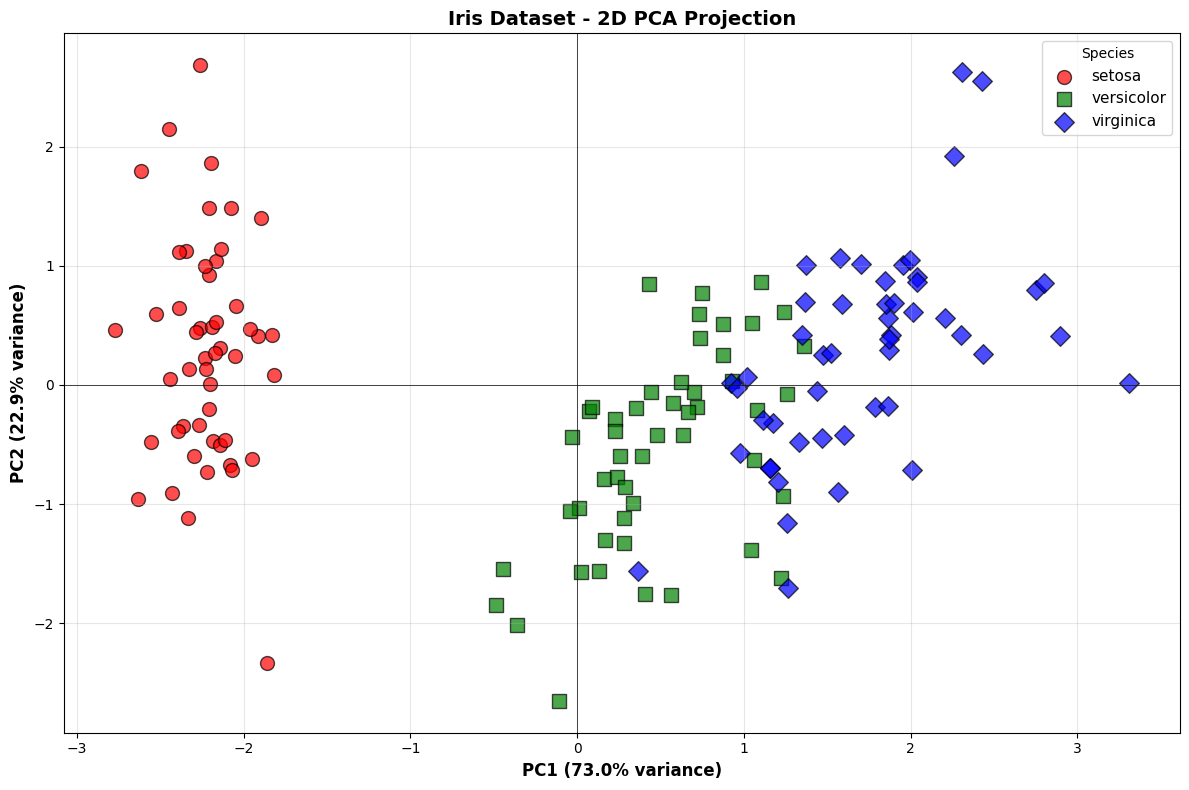

2D PCA visualization complete!
Notice: Setosa is well-separated, while Versicolor and Virginica overlap


In [11]:
# Visualize 2D PCA
plt.figure(figsize=(12, 8))

colors = ['red', 'green', 'blue']
markers = ['o', 's', 'D']

for i, (target, color, marker) in enumerate(zip(target_names, colors, markers)):
    indices = y == i
    plt.scatter(X_pca_2d[indices, 0], X_pca_2d[indices, 1],
                c=color, label=target, alpha=0.7, edgecolors='black',
                s=100, marker=marker)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)',
           fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)',
           fontsize=12, fontweight='bold')
plt.title('Iris Dataset - 2D PCA Projection', fontsize=14, fontweight='bold')
plt.legend(title='Species', fontsize=11)
plt.grid(alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.tight_layout()
plt.savefig('output/pca_2d_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("2D PCA visualization complete!")
print("Notice: Setosa is well-separated, while Versicolor and Virginica overlap")

## 10. PCA with 3 Components (3D Visualization)

In [12]:
# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print(f"Reduced dimensions (3D): {X_pca_3d.shape}")
print(f"Variance preserved: {pca_3d.explained_variance_ratio_.sum()*100:.2f}%")

# Save 3D PCA model
joblib.dump(pca_3d, 'models/pca_3d.joblib')
print("\n3D PCA model saved to models/pca_3d.joblib")

Reduced dimensions (3D): (150, 3)
Variance preserved: 99.48%

3D PCA model saved to models/pca_3d.joblib


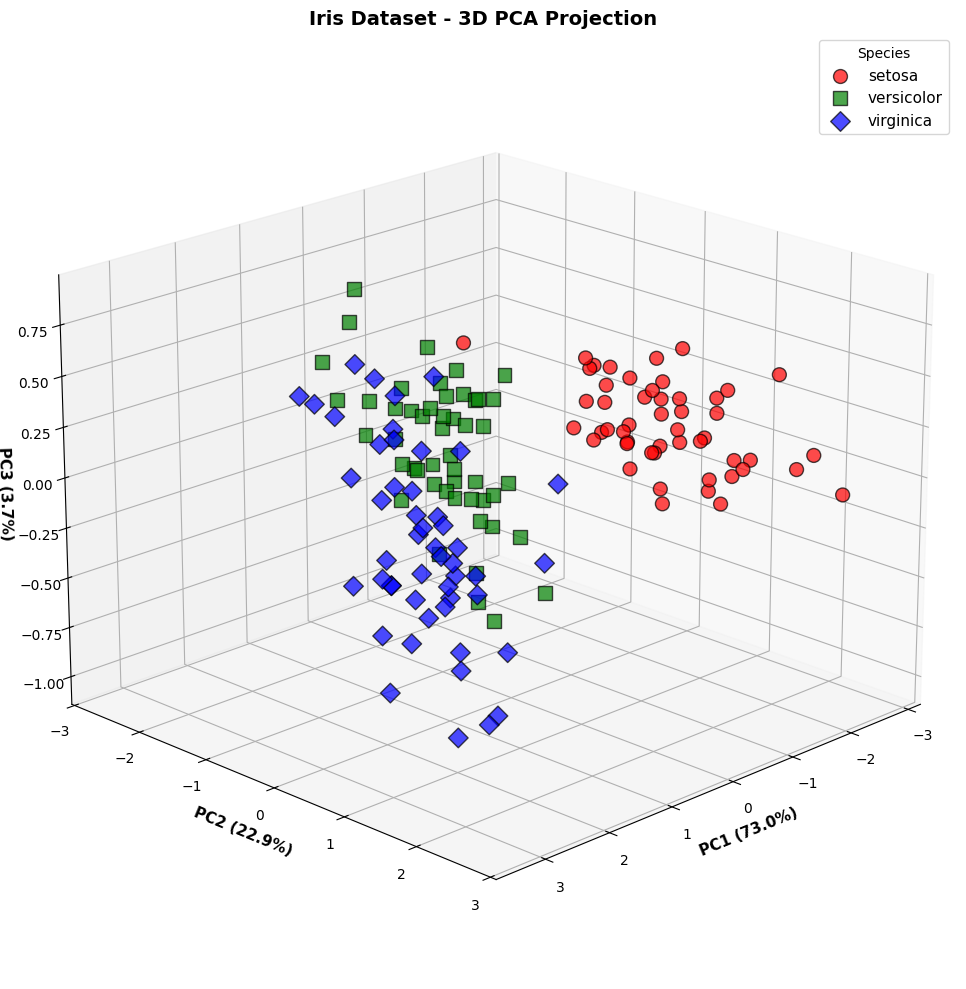

3D PCA visualization complete!
The third component adds additional separation between classes


In [13]:
# Create 3D visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue']
markers = ['o', 's', 'D']

for i, (target, color, marker) in enumerate(zip(target_names, colors, markers)):
    indices = y == i
    ax.scatter(X_pca_3d[indices, 0], X_pca_3d[indices, 1], X_pca_3d[indices, 2],
               c=color, label=target, alpha=0.7, edgecolors='black',
               s=100, marker=marker)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)',
              fontsize=11, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)',
              fontsize=11, fontweight='bold')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)',
              fontsize=11, fontweight='bold')
ax.set_title('Iris Dataset - 3D PCA Projection', fontsize=14, fontweight='bold')
ax.legend(title='Species', fontsize=11)
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.savefig('output/pca_3d_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("3D PCA visualization complete!")
print("The third component adds additional separation between classes")

## 11. Biplot - Combining Data and Loadings

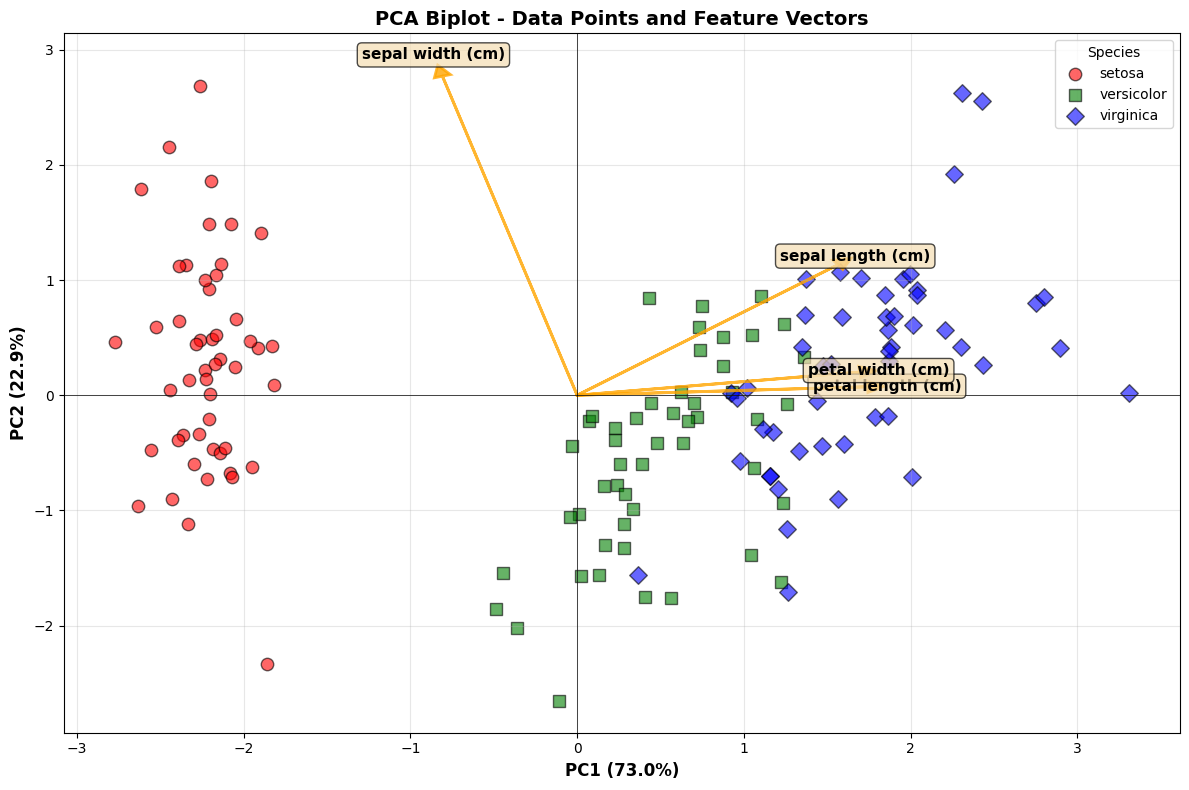

Biplot shows both data distribution and feature contributions
Arrow direction indicates how features contribute to principal components


In [14]:
# Create biplot for 2D PCA
def biplot(score, coeff, labels, y, target_names):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot data points
    colors = ['red', 'green', 'blue']
    markers = ['o', 's', 'D']
    
    for i, (target, color, marker) in enumerate(zip(target_names, colors, markers)):
        indices = y == i
        ax.scatter(score[indices, 0], score[indices, 1],
                  c=color, label=target, alpha=0.6, edgecolors='black',
                  s=80, marker=marker)
    
    # Plot feature vectors
    for i, label in enumerate(labels):
        ax.arrow(0, 0, coeff[i, 0]*3, coeff[i, 1]*3,
                head_width=0.1, head_length=0.1, fc='orange', ec='orange',
                linewidth=2, alpha=0.8)
        ax.text(coeff[i, 0]*3.2, coeff[i, 1]*3.2, label,
               fontsize=11, fontweight='bold', ha='center', va='center',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
    
    ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)',
                 fontsize=12, fontweight='bold')
    ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)',
                 fontsize=12, fontweight='bold')
    ax.set_title('PCA Biplot - Data Points and Feature Vectors',
                fontsize=14, fontweight='bold')
    ax.legend(title='Species', fontsize=10)
    ax.grid(alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    
    return fig

fig = biplot(X_pca_2d, pca_2d.components_.T, feature_names, y, target_names)
plt.tight_layout()
plt.savefig('output/pca_biplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Biplot shows both data distribution and feature contributions")
print("Arrow direction indicates how features contribute to principal components")

## 12. Classification Performance Comparison

Compare classification accuracy using different numbers of principal components

In [15]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nClass distribution in training set:")
print(pd.Series(y_train).value_counts().sort_index())

Training set size: 105
Test set size: 45

Class distribution in training set:
0    35
1    35
2    35
Name: count, dtype: int64


In [16]:
# Train classifiers with different numbers of components
results = {}

for n_components in [1, 2, 3, 4]:
    if n_components == 4:
        # Use original standardized features
        X_train_reduced = X_train
        X_test_reduced = X_test
        variance_kept = 100.0
    else:
        # Apply PCA
        pca_temp = PCA(n_components=n_components)
        X_train_reduced = pca_temp.fit_transform(X_train)
        X_test_reduced = pca_temp.transform(X_test)
        variance_kept = pca_temp.explained_variance_ratio_.sum() * 100
    
    # Train logistic regression
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train_reduced, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test_reduced)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    results[n_components] = {
        'accuracy': accuracy,
        'variance': variance_kept,
        'predictions': y_pred
    }
    
    print(f"\n{'='*60}")
    print(f"Components: {n_components} | Variance: {variance_kept:.2f}% | Accuracy: {accuracy*100:.2f}%")
    print(f"{'='*60}")
    print(classification_report(y_test, y_pred, target_names=target_names))


Components: 1 | Variance: 71.84% | Accuracy: 88.89%
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


Components: 2 | Variance: 96.02% | Accuracy: 88.89%
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


Components: 3 | Variance: 99.55% | Accuracy: 91.11%
              precision    recall  f1-score   support

      setosa       1.00 

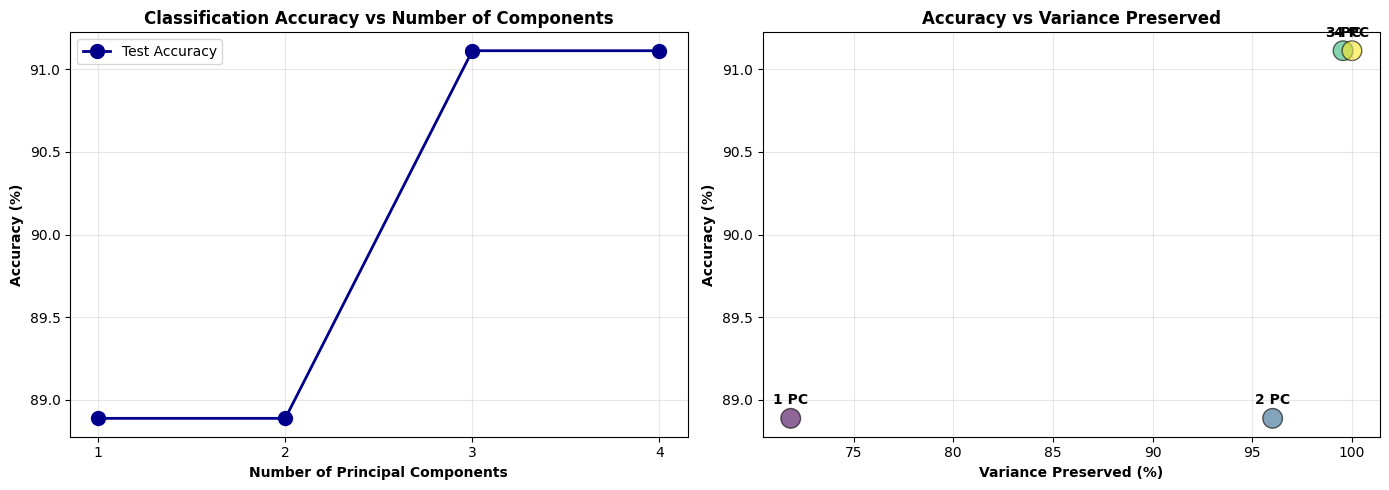


Key Insights:
Best accuracy: 91.11% with 3 components
2 components achieve 88.89% accuracy with only 96.0% variance


In [17]:
# Visualize accuracy vs components
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

components = list(results.keys())
accuracies = [results[k]['accuracy'] * 100 for k in components]
variances = [results[k]['variance'] for k in components]

# Accuracy plot
axes[0].plot(components, accuracies, marker='o', linewidth=2, markersize=10,
             color='darkblue', label='Test Accuracy')
axes[0].set_xlabel('Number of Principal Components', fontweight='bold')
axes[0].set_ylabel('Accuracy (%)', fontweight='bold')
axes[0].set_title('Classification Accuracy vs Number of Components',
                  fontweight='bold')
axes[0].set_xticks(components)
axes[0].grid(alpha=0.3)
axes[0].legend()

# Variance vs Accuracy
axes[1].scatter(variances, accuracies, s=200, alpha=0.6, c=components,
                cmap='viridis', edgecolors='black')
for i, comp in enumerate(components):
    axes[1].annotate(f'{comp} PC', (variances[i], accuracies[i]),
                     textcoords="offset points", xytext=(0,10),
                     ha='center', fontweight='bold')
axes[1].set_xlabel('Variance Preserved (%)', fontweight='bold')
axes[1].set_ylabel('Accuracy (%)', fontweight='bold')
axes[1].set_title('Accuracy vs Variance Preserved', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('output/classification_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Insights:")
best_comp = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
print(f"Best accuracy: {results[best_comp]['accuracy']*100:.2f}% with {best_comp} components")
print(f"2 components achieve {results[2]['accuracy']*100:.2f}% accuracy with only {results[2]['variance']:.1f}% variance")

## 13. Confusion Matrices for Different Dimensions

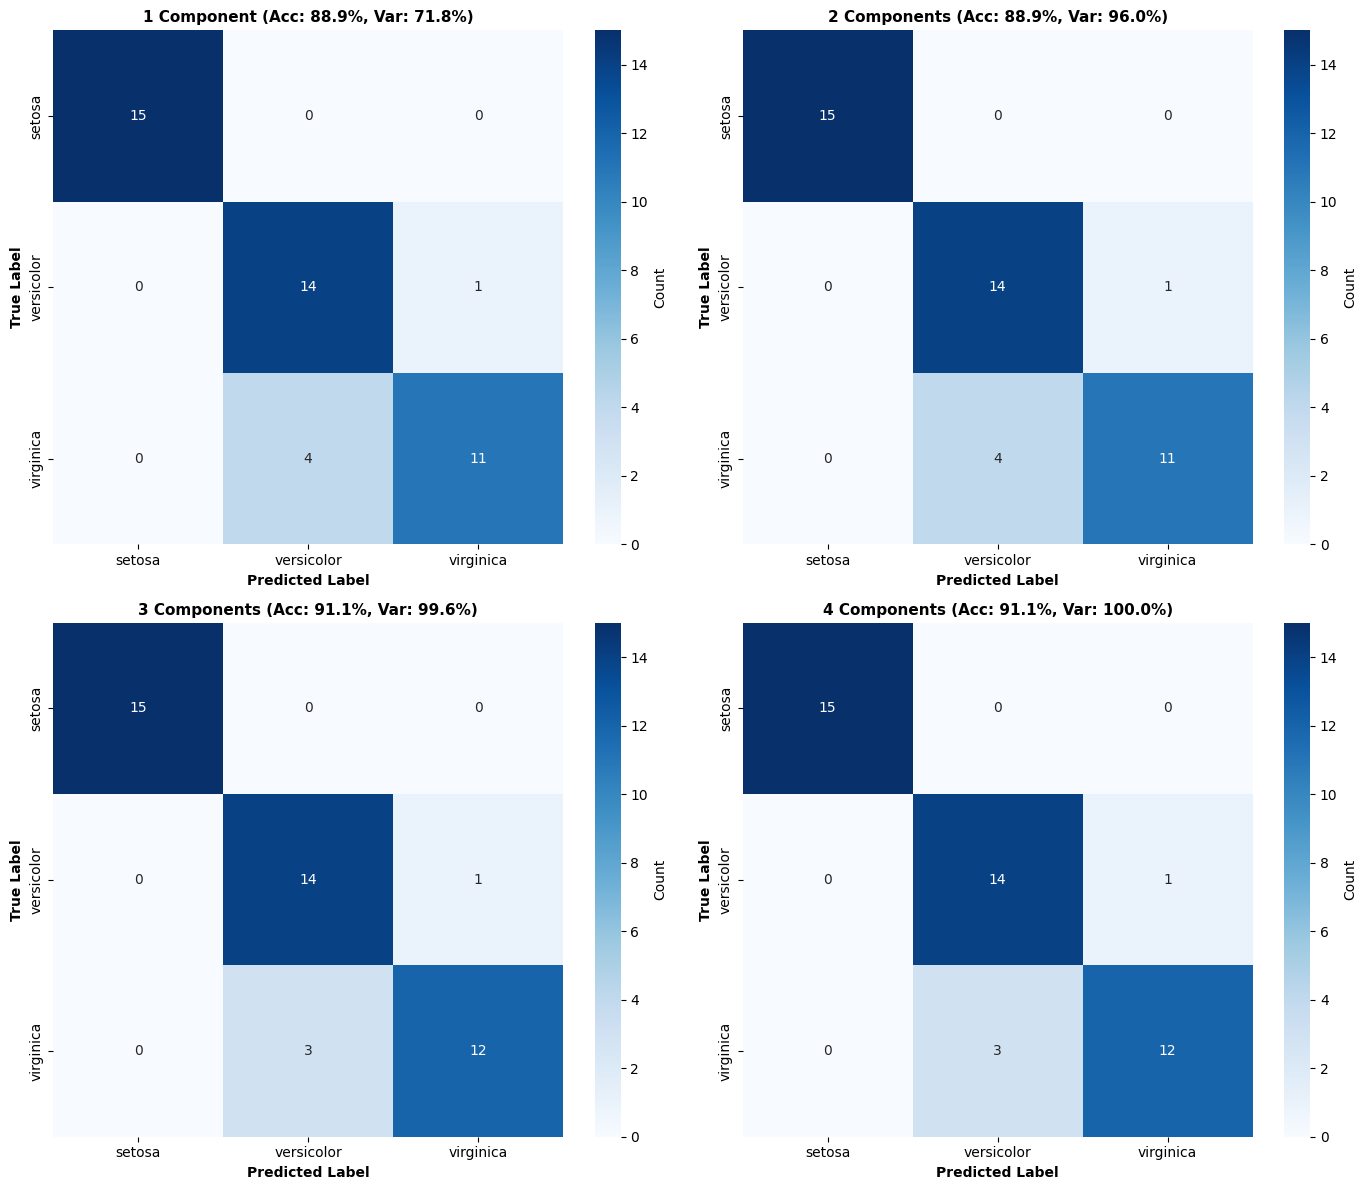

Confusion matrices show classification performance across dimensions


In [18]:
# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, n_comp in enumerate([1, 2, 3, 4]):
    cm = confusion_matrix(y_test, results[n_comp]['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_names, yticklabels=target_names,
                ax=axes[idx], cbar_kws={'label': 'Count'})
    
    axes[idx].set_title(
        f'{n_comp} Component{"s" if n_comp > 1 else ""} '
        f'(Acc: {results[n_comp]["accuracy"]*100:.1f}%, '
        f'Var: {results[n_comp]["variance"]:.1f}%)',
        fontweight='bold', fontsize=11
    )
    axes[idx].set_ylabel('True Label', fontweight='bold')
    axes[idx].set_xlabel('Predicted Label', fontweight='bold')

plt.tight_layout()
plt.savefig('output/confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("Confusion matrices show classification performance across dimensions")

## 14. Decision Boundary Visualization (2D PCA)

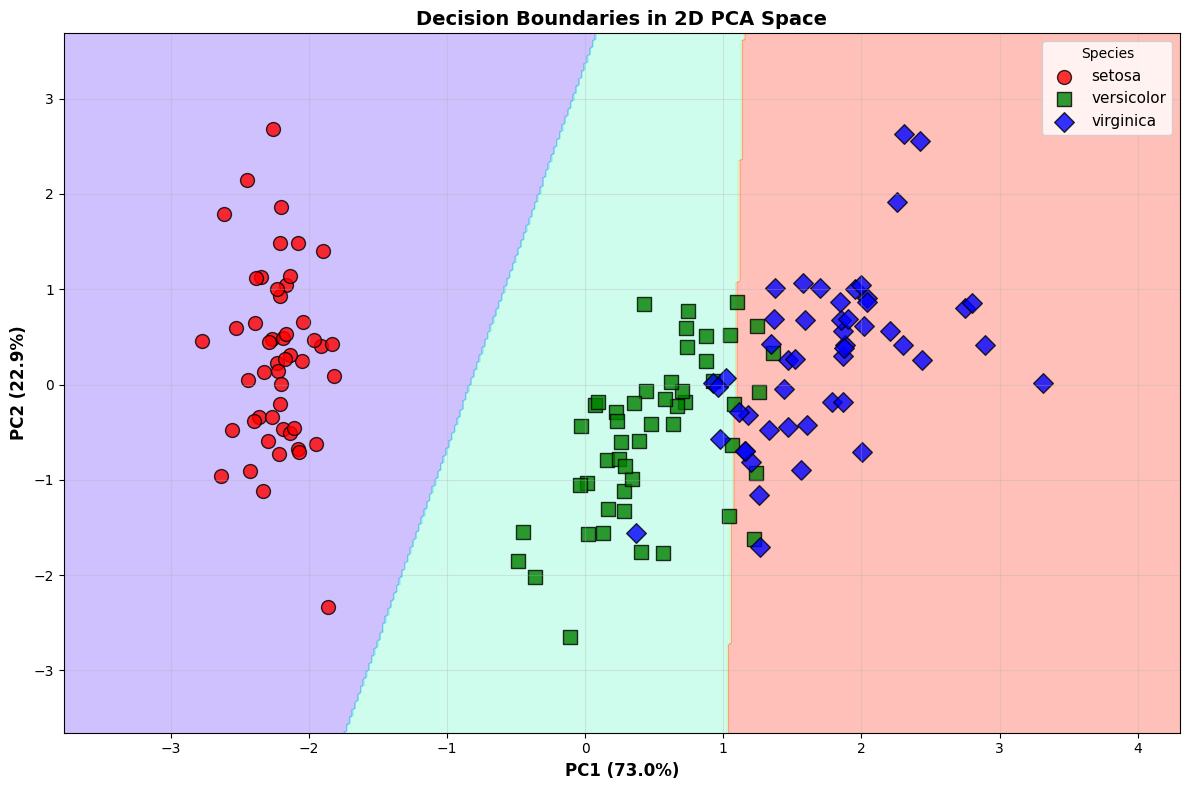

Decision boundaries visualized in 2D PCA space
Classification accuracy on full dataset: 93.33%


In [19]:
# Train classifier on full 2D PCA data
X_full_2d = pca_2d.transform(X_scaled)
clf_2d = LogisticRegression(max_iter=1000, random_state=42)
clf_2d.fit(X_full_2d, y)

# Create mesh for decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_full_2d[:, 0].min() - 1, X_full_2d[:, 0].max() + 1
y_min, y_max = X_full_2d[:, 1].min() - 1, X_full_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on mesh
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='rainbow')

# Plot data points
colors = ['red', 'green', 'blue']
markers = ['o', 's', 'D']

for i, (target, color, marker) in enumerate(zip(target_names, colors, markers)):
    indices = y == i
    plt.scatter(X_full_2d[indices, 0], X_full_2d[indices, 1],
                c=color, label=target, alpha=0.8, edgecolors='black',
                s=100, marker=marker)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)',
           fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)',
           fontsize=12, fontweight='bold')
plt.title('Decision Boundaries in 2D PCA Space', fontsize=14, fontweight='bold')
plt.legend(title='Species', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('output/decision_boundaries.png', dpi=300, bbox_inches='tight')
plt.show()

print("Decision boundaries visualized in 2D PCA space")
print(f"Classification accuracy on full dataset: {clf_2d.score(X_full_2d, y)*100:.2f}%")

## 15. Reconstruction Error Analysis

Components: 1 | Reconstruction MSE: 0.270376
Components: 2 | Reconstruction MSE: 0.041868
Components: 3 | Reconstruction MSE: 0.005179
Components: 4 | Reconstruction MSE: 0.000000


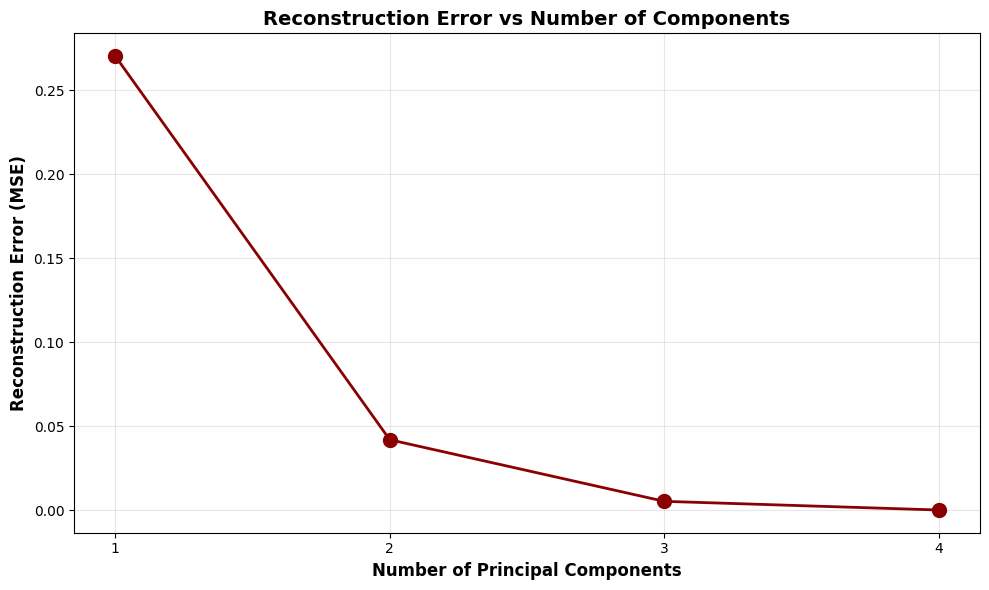


Lower reconstruction error means better preservation of original data


In [20]:
# Calculate reconstruction errors for different numbers of components
reconstruction_errors = []

for n_comp in range(1, 5):
    pca_temp = PCA(n_components=n_comp)
    X_transformed = pca_temp.fit_transform(X_scaled)
    X_reconstructed = pca_temp.inverse_transform(X_transformed)
    
    # Mean squared error
    mse = np.mean((X_scaled - X_reconstructed) ** 2)
    reconstruction_errors.append(mse)
    
    print(f"Components: {n_comp} | Reconstruction MSE: {mse:.6f}")

# Plot reconstruction error
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), reconstruction_errors, marker='o', linewidth=2,
         markersize=10, color='darkred')
plt.xlabel('Number of Principal Components', fontweight='bold', fontsize=12)
plt.ylabel('Reconstruction Error (MSE)', fontweight='bold', fontsize=12)
plt.title('Reconstruction Error vs Number of Components', 
          fontweight='bold', fontsize=14)
plt.xticks(range(1, 5))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('output/reconstruction_error.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nLower reconstruction error means better preservation of original data")

## 16. Feature Space Comparison: Before and After PCA

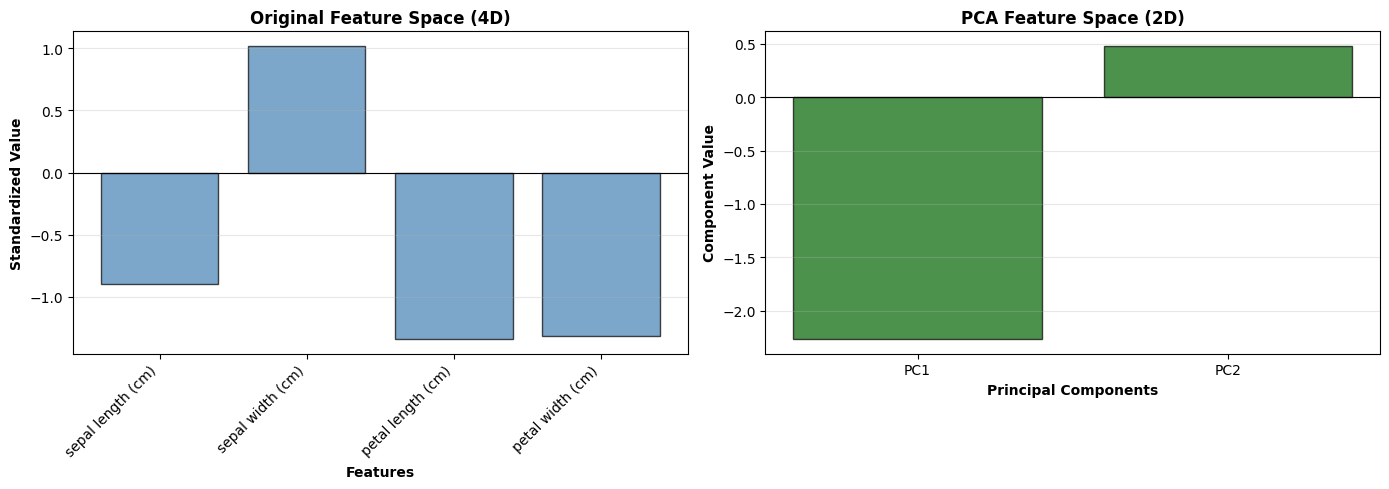

Sample belongs to class: setosa
Dimensionality reduced from 4D to 2D while preserving 95.8% variance


In [21]:
# Compare original features vs PCA components for a sample
sample_idx = 0
sample_original = X_scaled[sample_idx]
sample_pca = X_pca_2d[sample_idx]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original features
axes[0].bar(range(len(feature_names)), sample_original, color='steelblue',
            alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Features', fontweight='bold')
axes[0].set_ylabel('Standardized Value', fontweight='bold')
axes[0].set_title('Original Feature Space (4D)', fontweight='bold')
axes[0].set_xticks(range(len(feature_names)))
axes[0].set_xticklabels(feature_names, rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(y=0, color='black', linewidth=0.8)

# PCA components
axes[1].bar(range(2), sample_pca, color='darkgreen', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Principal Components', fontweight='bold')
axes[1].set_ylabel('Component Value', fontweight='bold')
axes[1].set_title('PCA Feature Space (2D)', fontweight='bold')
axes[1].set_xticks(range(2))
axes[1].set_xticklabels(['PC1', 'PC2'])
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(y=0, color='black', linewidth=0.8)

plt.tight_layout()
plt.savefig('output/feature_space_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Sample belongs to class: {target_names[y[sample_idx]]}")
print(f"Dimensionality reduced from 4D to 2D while preserving {pca_2d.explained_variance_ratio_.sum()*100:.1f}% variance")

## 17. Save Results and Models

In [22]:
# Save PCA-transformed data
df_pca_2d.to_csv('output/iris_pca_2d.csv', index=False)

df_pca_3d = pd.DataFrame(
    data=X_pca_3d,
    columns=['PC1', 'PC2', 'PC3']
)
df_pca_3d['species'] = pd.Categorical.from_codes(y, target_names)
df_pca_3d.to_csv('output/iris_pca_3d.csv', index=False)

print("PCA-transformed data saved to CSV files")

PCA-transformed data saved to CSV files


In [23]:
# Save comprehensive results
results_summary = {
    'dataset': {
        'name': 'Iris Dataset',
        'n_samples': len(X),
        'n_features': X.shape[1],
        'n_classes': len(target_names),
        'classes': target_names.tolist()
    },
    'pca_analysis': {
        'explained_variance_ratio': explained_variance.tolist(),
        'cumulative_variance': cumulative_variance.tolist(),
        'variance_2_components': float(cumulative_variance[1]),
        'variance_3_components': float(cumulative_variance[2])
    },
    'component_loadings': loadings.to_dict(),
    'classification_results': {
        f'{n_comp}_components': {
            'accuracy': float(results[n_comp]['accuracy']),
            'variance_preserved': float(results[n_comp]['variance'])
        }
        for n_comp in results.keys()
    },
    'reconstruction_errors': {
        f'{i+1}_components': float(err)
        for i, err in enumerate(reconstruction_errors)
    },
    'best_performance': {
        'n_components': best_comp,
        'accuracy': float(results[best_comp]['accuracy']),
        'variance_preserved': float(results[best_comp]['variance'])
    }
}

# Save to JSON
with open('output/pca_results.json', 'w') as f:
    json.dump(results_summary, f, indent=2)

print("\nResults summary saved to output/pca_results.json")
print("\nAll models saved:")
print("  - models/scaler.joblib")
print("  - models/pca_2d.joblib")
print("  - models/pca_3d.joblib")


Results summary saved to output/pca_results.json

All models saved:
  - models/scaler.joblib
  - models/pca_2d.joblib
  - models/pca_3d.joblib


## 18. Summary and Conclusions

In [24]:
print("="*70)
print("PCA DIMENSIONALITY REDUCTION - SUMMARY")
print("="*70)
print(f"\nDataset: {results_summary['dataset']['name']}")
print(f"Original Dimensions: {results_summary['dataset']['n_features']}")
print(f"Samples: {results_summary['dataset']['n_samples']}")
print(f"Classes: {', '.join(results_summary['dataset']['classes'])}")

print("\n" + "="*70)
print("VARIANCE EXPLAINED")
print("="*70)
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {var*100:6.2f}% (Cumulative: {cum_var*100:6.2f}%)")

print("\n" + "="*70)
print("CLASSIFICATION PERFORMANCE")
print("="*70)
print(f"{'Components':<12} {'Variance':<15} {'Accuracy':<12}")
print("-"*70)
for n_comp in sorted(results.keys()):
    print(f"{n_comp:<12} {results[n_comp]['variance']:>6.2f}%{'':<7} {results[n_comp]['accuracy']*100:>6.2f}%")

print("\n" + "="*70)
print("KEY INSIGHTS")
print("="*70)
print(f"✓ First 2 components capture {cumulative_variance[1]*100:.1f}% of variance")
print(f"✓ First 3 components capture {cumulative_variance[2]*100:.1f}% of variance")
print(f"✓ Best classification: {results[best_comp]['accuracy']*100:.1f}% accuracy with {best_comp} components")
print(f"✓ With just 2 components: {results[2]['accuracy']*100:.1f}% accuracy ({results[2]['variance']:.1f}% variance)")
print(f"✓ Dimensionality reduction: 4D → 2D reduces features by 50% with minimal accuracy loss")

print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
print("PC1: Primarily captures overall flower size (all features contribute positively)")
print("PC2: Separates sepal characteristics from petal characteristics")
print("PC3: Adds finer distinctions between classes")
print("PC4: Captures remaining variance (minimal contribution)")

print("\n" + "="*70)
print("VISUALIZATIONS GENERATED")
print("="*70)
visualizations = [
    'correlation_matrix.png',
    'pairplot_original.png',
    'explained_variance.png',
    'component_loadings.png',
    'pca_2d_scatter.png',
    'pca_3d_scatter.png',
    'pca_biplot.png',
    'classification_performance.png',
    'confusion_matrices.png',
    'decision_boundaries.png',
    'reconstruction_error.png',
    'feature_space_comparison.png'
]
for i, viz in enumerate(visualizations, 1):
    print(f"{i:2d}. {viz}")

print("\n" + "="*70)
print("CONCLUSION")
print("="*70)
print("PCA successfully reduced the Iris dataset from 4 dimensions to 2 dimensions")
print(f"while preserving {cumulative_variance[1]*100:.1f}% of the variance and maintaining")
print(f"{results[2]['accuracy']*100:.1f}% classification accuracy. This demonstrates the power of PCA")
print("for dimensionality reduction, visualization, and feature extraction.")
print("="*70)

PCA DIMENSIONALITY REDUCTION - SUMMARY

Dataset: Iris Dataset
Original Dimensions: 4
Samples: 150
Classes: setosa, versicolor, virginica

VARIANCE EXPLAINED
PC1:  72.96% (Cumulative:  72.96%)
PC2:  22.85% (Cumulative:  95.81%)
PC3:   3.67% (Cumulative:  99.48%)
PC4:   0.52% (Cumulative: 100.00%)

CLASSIFICATION PERFORMANCE
Components   Variance        Accuracy    
----------------------------------------------------------------------
1             71.84%         88.89%
2             96.02%         88.89%
3             99.55%         91.11%
4            100.00%         91.11%

KEY INSIGHTS
✓ First 2 components capture 95.8% of variance
✓ First 3 components capture 99.5% of variance
✓ Best classification: 91.1% accuracy with 3 components
✓ With just 2 components: 88.9% accuracy (96.0% variance)
✓ Dimensionality reduction: 4D → 2D reduces features by 50% with minimal accuracy loss

INTERPRETATION
PC1: Primarily captures overall flower size (all features contribute positively)
PC2: Separat